In [35]:
import pandas as pd  # import pandas and rename it pd
import numpy as np
from IPython.display import display

## 1 - Basic data structures

#### 1-1 pandas Series

In [36]:
"""
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). 
The axis labels are collectively referred to as the index
s = pd.Series(data, index=index), where data is sequnce data , index is sequencial index
"""

s = pd.Series(data=["a", "b", "c"], index=range(3))
s

0    a
1    b
2    c
dtype: object

In [37]:
"""
looping through value-by-value is usually not necessary. The same is true when working with Series in pandas
"""

print(s * 2)  # means multiply every element in series s by 2
print(s + "_hello")

0    aa
1    bb
2    cc
dtype: object
0    a_hello
1    b_hello
2    c_hello
dtype: object


#### 1-2 Dataframe

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object

![](https://pynative.com/wp-content/uploads/2021/02/dataframe.png)

In [38]:
# Like Series, DataFrame accepts many different kinds of input:
# for example from dict of lists
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
df = pd.DataFrame(data=d)
df

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


## Column selection, addition, deletion

In [39]:
display(df["one"])  # select column named one
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2  # df["one"] where its value > 2 return boolean column
del df["two"]
df

0    1.0
1    2.0
2    3.0
3    4.0
Name: one, dtype: float64

,one,three,flag
0,1.0,4.0,False
1,2.0,6.0,False
2,3.0,6.0,True
3,4.0,4.0,True


In [40]:
# adding new columns using assign() method
df = pd.read_csv("./sample.csv")
display(df)
print("=" * 50)
df = df.assign(
    water_multi=df["water_need"] * 2
)  # assign() always returns a copy of the data, leaving the original DataFrame untouched.
display(df)

,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600
2,elephant,1003,550
3,tiger,1004,300
4,tiger,1005,320
5,tiger,1006,330
6,tiger,1007,290
7,tiger,1008,310
8,zebra,1009,200
9,zebra,1010,220


,animal,uniq_id,water_need,water_multi
0,elephant,1001,500,1000
1,elephant,1002,600,1200
2,elephant,1003,550,1100
3,tiger,1004,300,600
4,tiger,1005,320,640
5,tiger,1006,330,660
6,tiger,1007,290,580
7,tiger,1008,310,620
8,zebra,1009,200,400
9,zebra,1010,220,440


##  Indexing / selection / slicing
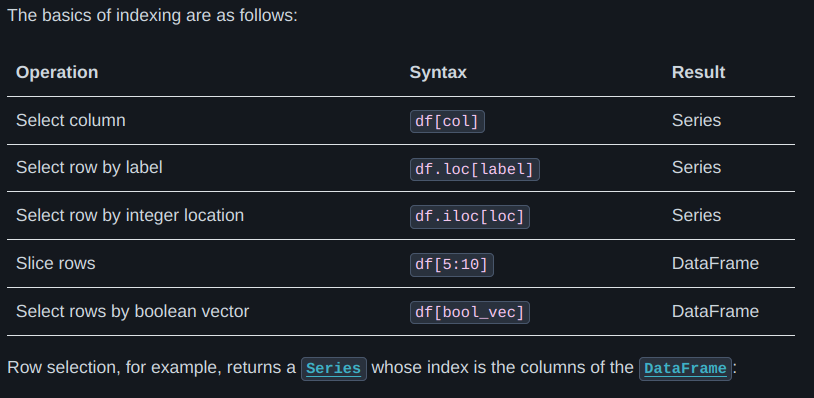

In [41]:
display(df.loc[0])  # select row where it index labeled 0
display(df.iloc[5])  # select row where its index location is 5
display(df[5:10])  # select all rows from index 5 to 10
display(df[df["water_need"] >= 500])  # select based on condition
display(
    df[["animal", "uniq_id"]][3:7]
)  # select rows from 3:7 from the subset columns animal,unique_id

animal         elephant
uniq_id            1001
water_need          500
water_multi        1000
Name: 0, dtype: object

animal         tiger
uniq_id         1006
water_need       330
water_multi      660
Name: 5, dtype: object

,animal,uniq_id,water_need,water_multi
5,tiger,1006,330,660
6,tiger,1007,290,580
7,tiger,1008,310,620
8,zebra,1009,200,400
9,zebra,1010,220,440


,animal,uniq_id,water_need,water_multi
0,elephant,1001,500,1000
1,elephant,1002,600,1200
2,elephant,1003,550,1100
16,lion,1017,600,1200
17,lion,1018,500,1000


,animal,uniq_id
3,tiger,1004
4,tiger,1005
5,tiger,1006
6,tiger,1007


## Summarizing data: describe

In [42]:
series = pd.Series(np.random.randn(1000))
series.describe()

count    1000.000000
mean        0.023327
std         0.979566
min        -2.643211
25%        -0.640558
50%         0.027549
75%         0.681079
max         3.408151
dtype: float64

In [43]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])
display(frame)
frame.describe()

,a,b,c,d,e
0,2.290283,0.218868,0.489319,1.069086,1.143788
1,-0.492408,-0.183742,-0.654772,-0.197968,-0.639595
2,-0.837223,-0.169671,0.245955,0.970277,-1.469271
3,-1.247745,-1.157423,0.475147,0.353417,-0.924640
4,-0.265330,-0.704658,-1.389577,-1.269389,-0.765542
...,...,...,...,...,...
995,0.787106,-1.692057,1.101180,-0.556958,-1.187051
996,-0.592900,1.847019,-0.586915,0.038381,-1.495963
997,-0.791016,0.024608,0.040490,-0.191709,-0.143142
998,1.662294,0.489327,0.560411,1.236445,0.539395


,a,b,c,d,e
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.008483,0.002329,0.014492,0.011488,0.039141
std,1.006710,0.992426,0.993667,0.968260,1.004376
min,-3.049592,-2.878667,-3.971811,-3.423975,-2.836870
25%,-0.637235,-0.694719,-0.655147,-0.604777,-0.682023
50%,0.005285,-0.007804,-0.004917,0.014208,0.069206
75%,0.686553,0.699098,0.693025,0.651374,0.726614
max,3.130634,2.914653,3.220062,3.436639,3.182823


## Row or column-wise function application
Arbitrary functions can be applied along the axes of a DataFrame using the apply() method

apply() takes param "axis" if axis=0 means apply column wise if axis=1 means apply rows wise

In [44]:
index = pd.date_range("1/1/2000", periods=8)
df = pd.DataFrame(
    (np.random.randn(8, 3) * 10).astype(np.int16), index=index, columns=["A", "B", "C"]
)
display(df)

,A,B,C
2000-01-01,0,-2,-15
2000-01-02,0,0,-26
2000-01-03,-5,17,2
2000-01-04,-23,-19,-18
2000-01-05,11,-4,18
2000-01-06,-2,-1,2
2000-01-07,-3,4,-4
2000-01-08,14,6,19


In [45]:
display(df.apply(np.mean, axis=0))
display(df.apply(np.mean, axis=1))
# we can also define custom function to use inside apply
from typing import List


def add_all_multi_last(sequence: List) -> int:
    """sum all elements in row or col then multiply last one
    eg row=[1,2,3,4] then return (1+2+3)*4

    Args:
        sequence (List): row or col
    """
    return sum(sequence[: len(sequence) - 1]) * sequence[-1]


display(df.apply(add_all_multi_last, axis=0))
display(df.apply(add_all_multi_last, axis=1))

A   -1.000
B    0.125
C   -2.750
dtype: float64

2000-01-01    -5.666667
2000-01-02    -8.666667
2000-01-03     4.666667
2000-01-04   -20.000000
2000-01-05     8.333333
2000-01-06    -0.333333
2000-01-07    -1.000000
2000-01-08    13.000000
Freq: D, dtype: float64

/tmp/ipykernel_17627/1614953796.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return sum(sequence[: len(sequence) - 1]) * sequence[-1]


A   -308
B    -30
C   -779
dtype: int64

2000-01-01     30
2000-01-02      0
2000-01-03     24
2000-01-04    756
2000-01-05    126
2000-01-06     -6
2000-01-07     -4
2000-01-08    380
Freq: D, dtype: int64

## pandas data filtering

In [46]:
# Creating a sample DataFrame
data = {"Product": ["A", "B", "C", "D"], "SalesAmount": [1200, 800, 1500, 600]}
df = pd.DataFrame(data)
display(df)
print("=" * 25)
# Filtering data where SalesAmount is greater than 1000
filtered_data = df[(df["SalesAmount"] > 1000) & (df["SalesAmount"] < 1500)]
display(filtered_data)

,Product,SalesAmount
0,A,1200
1,B,800
2,C,1500
3,D,600


,Product,SalesAmount
0,A,1200


In [47]:
# Creating a sample DataFrame
data = {
    "CustomerID": ["A", "B", "C", "D"],
    "Location": ["New York", "Los Angeles", "Chicago", "Los Angeles"],
}
df = pd.DataFrame(data)
display(df)
print("=" * 25)
# Filtering data for customers in New York or Los Angeles
cities_to_filter = ["New York", "Los Angeles"]
filtered_data = df[df["Location"].isin(cities_to_filter)]
display(filtered_data)

,CustomerID,Location
0,A,New York
1,B,Los Angeles
2,C,Chicago
3,D,Los Angeles


,CustomerID,Location
0,A,New York
1,B,Los Angeles
3,D,Los Angeles


In [48]:
# Creating a sample DataFrame
data = {
    "ProductID": [1, 2, 3, 4, 5],
    "ProductName": [
        "Premium Laptop",
        "Tablet",
        "Premium Smartphone",
        "Keyboard",
        "Budget Headphone",
    ],
}
df = pd.DataFrame(data)
display(df)
print("=" * 25)
# Filtering products with 'premium' in their names
filtered_data = df[df["ProductName"].str.contains("premium", case=False)]
display(filtered_data)
# Filtering products with 'phones' in their names
filtered_data = df[df["ProductName"].str.contains("phone", case=False)]
display(filtered_data)

,ProductID,ProductName
0,1,Premium Laptop
1,2,Tablet
2,3,Premium Smartphone
3,4,Keyboard
4,5,Budget Headphone


,ProductID,ProductName
0,1,Premium Laptop
2,3,Premium Smartphone


,ProductID,ProductName
2,3,Premium Smartphone
4,5,Budget Headphone


#### Pandas Sorting

pandas supports three kinds of sorting: sorting by index labels, sorting by column values, and sorting by a combination of both

In [49]:
df = pd.DataFrame(
    {
        "c1": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "c2": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "c3": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
    }
)
unsorted_df = df.reindex(index=["a", "d", "c", "b"], columns=["c3", "c2", "c1"])
display(unsorted_df)
# sort by index
sorted_df_as = unsorted_df.sort_index()
sorted_df_desc = unsorted_df.sort_index(ascending=False)
display(sorted_df_as)
display(sorted_df_desc)
# sort by column names
sorted_col_as = unsorted_df.sort_index(axis=1)
display(sorted_col_as)

,c3,c2,c1
a,NaN,-0.641229,-0.771710
d,0.478459,-1.509739,NaN
c,-0.376943,0.024114,-0.767892
b,-1.349690,-0.258928,0.013914


,c3,c2,c1
a,NaN,-0.641229,-0.771710
b,-1.349690,-0.258928,0.013914
c,-0.376943,0.024114,-0.767892
d,0.478459,-1.509739,NaN


,c3,c2,c1
d,0.478459,-1.509739,NaN
c,-0.376943,0.024114,-0.767892
b,-1.349690,-0.258928,0.013914
a,NaN,-0.641229,-0.771710


,c1,c2,c3
a,-0.771710,-0.641229,NaN
d,NaN,-1.509739,0.478459
c,-0.767892,0.024114,-0.376943
b,0.013914,-0.258928,-1.349690


In [50]:
# sort by values
df1 = pd.DataFrame({"c1": [2, 1, 1, 1], "c2": [1, 3, 2, 4], "c3": ["a", "b", "x", "z"]})
print("original df \n")
display(df1, "=" * 25)
dfsbyc2 = df1.sort_values(by="c2")
display(dfsbyc2, "=" * 25)
dfsbyc3_dsc = df1.sort_values(by="c3", ascending=False)
display(dfsbyc3_dsc, "=" * 25)

original df 



,c1,c2,c3
0,2,1,a
1,1,3,b
2,1,2,x
3,1,4,z


'========================='

,c1,c2,c3
0,2,1,a
2,1,2,x
1,1,3,b
3,1,4,z


'========================='

,c1,c2,c3
3,1,4,z
2,1,2,x
1,1,3,b
0,2,1,a


'========================='

In [51]:
# hands on lab
from urllib.request import urlretrieve

data_url = "https://gist.githubusercontent.com/aakashns/28b2e504b3350afd9bdb157893f9725c/raw/994b65665757f4f8887db1c85986a897abb23d84/countries.csv"

urlretrieve(data_url, "countries.csv")
countries_df = pd.read_csv("countries.csv")
countries_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


In [52]:
# Q1: How many countries does the dataframe contain?

In [53]:
# Q2: Retrieve a list of continents from the dataframe?

In [54]:
# Q3: Create a dataframe containing 10 countries with the highest population.

In [55]:
# Q4: Add a new column in `countries_df` to record the overall GDP per country (product of population & per capita GDP)

In [ ]:
# Q5: filter to find all countries that lies inside Europe

In [56]:
# Q6: create a dataframe containing 10 countries with the lowest GDP per capita, among the counties with population greater than 100 million.

In [57]:
# Q7: which location in continent Asia has highest life_expectancy